In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

## Stochastic neuron differential equation (Gaussian Approximation)
The voltage equation can be written in terms of voltage variance for fast synapses:

\begin{equation}
\tau\frac{dV}{dt} = E_0-V+\sigma_V\sqrt{2\tau}\xi
\end{equation}

where $E_0$ is the mean voltage and $\sigma_V^2$ is the variance of the voltage. This is similar to the equation

\begin{equation}
\frac{dV}{dt} = \frac{Ra\tau-V}{\tau} + a\sqrt{R}\xi(t)
\end{equation}

written in terms of rate of spikes, $R$, amplitude, $a$, where $\tau$ is the closing time constant and $\zeta(t) = lim_{\Delta\rightarrow0}\frac{\phi}{\sqrt{\Delta}}$. $\phi$ is a Gaussian random number with mean $0$ and variance $1$.

Comparing the two equations, the theoretical mean, $\mu$ of the voltage is $Ra\tau$ while the variance, $\sigma_V^2$ should be $\frac{Ra^2\tau}{2}$.

The model has a voltage threshold at $V_{th}=10$ and a reset value at $V_{re}=0$, and hence whenever the voltage reaches a peak at $V_{th}$, the voltage will reset to $0$.

In [ ]:
sigV = 2 #standard deviation
tau = 20 #closing time constant
Vth = 10 #voltage threshold
Vre = 0 #reset voltage
TotalT = 10000 #ms    #Total time sampled

In [ ]:
def StochDE(E0, sigV, tau, Vth, Vre, TotalT):
  dt = 0.1
  t = np.arange(0, TotalT, dt)
  n = int(TotalT/dt)
  V = np.zeros([n])
  counter = 0
  for i in range(0, n-1):
    mu, sigma = 0, 1
    if V[i] < Vth:
      V[i+1] = V[i] + (dt/tau)*(E0-V[i]) + np.sqrt(2*dt/tau)*sigV*np.random.normal(mu, sigma, 1)
    else:
      V[i+1] = Vre
      counter += 1
  rate = counter/TotalT #ms^-1
  return rate*1000 #s^-1 

In [ ]:
k = 25
Rates = np.zeros([k-1])
meanVs = np.arange(1, k)
for i in range (0, k-1):
  Rates[i] = StochDE(i+1, sigV, tau, Vth, Vre, TotalT)
print(Rates)

[ 0.   0.   0.   0.8  2.   3.5  7.  10.1 16.4 21.6 27.  30.9 36.4 41.4
 48.1 51.6 57.5 62.4 66.6 71.4 77.9 82.3 86.4 90.3]


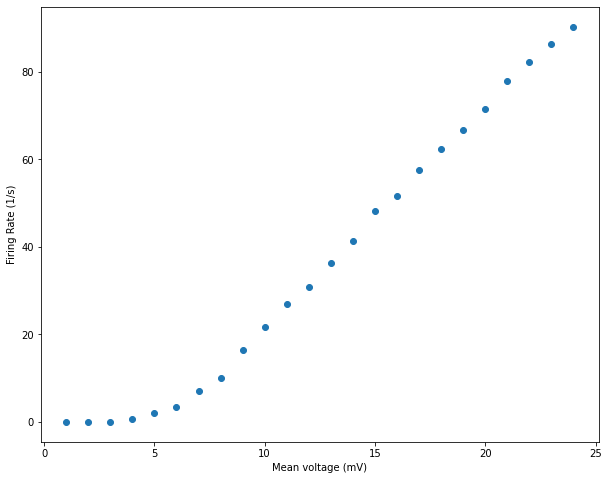

In [ ]:
figure = plt.figure(figsize=(10,8))
plt.scatter(meanVs, Rates)
plt.xlabel('Mean voltage (mV)')
plt.ylabel('Firing Rate (1/s)')
plt.show()

##**Fokker-Planck Equation**
\begin{equation}
\tau_0\frac{\partial P}{\partial t}=\sigma_V^2\frac{\partial^2 P}{\partial V^2} +\frac{\partial}{\partial V}((V-E_0)P)
\end{equation}

From equation (7) in LN8,
\begin{equation}
\tau_0J=(E_0-V)P-\sigma_V^2\frac{dP}{dV}
\end{equation}

set the threshold for the spikes, $V_{th}$ and a reset value, $V_{re}$, and consider the steady state case where $\partial P/\partial t=0$.
Hence,

\begin{equation}
r = J(V_{th})
\end{equation}

Write $J=r\theta(V-V_{re})$ for $V\leq V_{th}$ and $x=(V-E_0)/\sigma_V$, so that $P(V)dV=p(x)dx$. 

Using the condition that $\int_{-\infty}^{x_{th}}p(x)dx=1$ the firing rate is found to be $$r = \frac{1}{\tau_0}Z$$ where $$Z=\int_0^\infty \frac{dz}{z}(e^{x_{th}z}- e^{x_{re}z})e^{-z^2/2}$$

In [ ]:
def func(z, xth, xre):
  if z == 0:
    return (xth - xre)
  else:
    return (1/z)*(np.exp(xth*z)-np.exp(xre*z))*np.exp(-(z**2)/2)

def Ratefn(E0):
  xth = (Vth-E0)/sigV
  xre = (Vre-E0)/sigV

  z0 = 0
  infty = 100
  dz = 0.001 
  n = int(infty/dz)
  areas = np.zeros([n]) #n numbers
  z = np.linspace(z0, infty, n+1) #n+1 numbers

  for i in range(0, n-1):
    areas[i] = (1/2)*(z[i+1]-z[i])*(func(z[i+1], xth, xre)+ func(z[i], xth, xre))
  Zfunc = np.sum(areas)
  rate = (1/(tau*Zfunc))*1000 #1/s
  return rate

In [ ]:
E01 = 0
E0f = 25
dE0 = 0.1
k = int(E0f/dE0)

E0s = np.arange(E01, E0f, dE0)
R = np.zeros([k])

for i in range(0, k):
  R[i] = Ratefn(E0s[i])

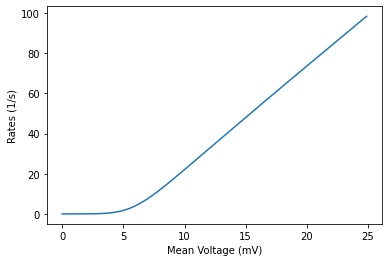

In [ ]:
plt.xlabel('Mean Voltage (mV)')
plt.ylabel('Rates (1/s)')
plt.plot(E0s, R)

Combining the scatter plot of rates from the Gaussian Approximation and the line of rates against mean voltage from equation (16) of LN8, the line is a best fit to the scatter plot.

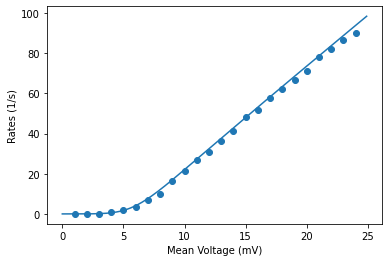

In [ ]:
plt.xlabel('Mean Voltage (mV)')
plt.ylabel('Rates (1/s)')
plt.scatter(meanVs, Rates)
plt.plot(E0s, R)